In [90]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [91]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [92]:
X_train.shape

(60000, 28, 28)

In [83]:
#X_train=X_train.reshape(-1,28,28,1)
#X_test=X_test.reshape(-1,28,28,1)

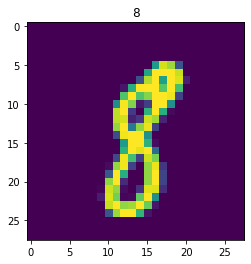

In [93]:
plt.imshow(X_train[300])
plt.title(y_train[300])
plt.show()

In [94]:
X_train.shape

(60000, 28, 28)

In [78]:
#X_train=X_train.reshape((-1,28,28,1))

In [64]:
##creating a model


In [95]:
from keras.layers import Dense,Conv2D,AveragePooling2D,Flatten
from keras.models import Sequential


In [96]:
model=Sequential()

In [97]:
model.add(Conv2D(filters = 4,kernel_size = (5,5),activation ='relu', input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 4,kernel_size = (7,7),activation ='relu', input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units = 10,activation='softmax'))


In [98]:
model.compile(loss="sparse_categorical_crossentropy" ,optimizer = 'adam' ,metrics=['acc'])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
average_pooling2d_2 (Average (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 4)           788       
_________________________________________________________________
average_pooling2d_3 (Average (None, 3, 3, 4)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                370       
Total params: 1,262
Trainable params: 1,262
Non-trainable params: 0
____________________________________________________

In [70]:
model.fit(X_train,y_train,epochs= 1,batch_size= 1)

60000/60000 [==============================] - 119s 2ms/step - loss: 0.8504 - acc: 0.7397


In [99]:
import cv2

In [52]:
#img=cv2.imread("")

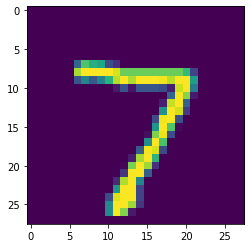

In [100]:
plt.imshow(X_test[0])

In [101]:
test=X_test[0].reshape(-1,28,28,1)

In [102]:
model.predict_classes(test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])

In [103]:
model.save("./my_model.h5")